In [39]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
print("libraries loaded")

train = pd.read_csv("G:/Datasets/disaster/train.csv", header = 0)
train.shape

libraries loaded


(7613, 5)

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
distinct_keywords = train.keyword.unique()
len(distinct_keywords)

222

In [6]:
distinct_freq = train['keyword'].value_counts()
distinct_freq

fatalities               45
armageddon               42
deluge                   42
harm                     41
damage                   41
body%20bags              41
sinking                  41
fear                     40
evacuate                 40
windstorm                40
twister                  40
collided                 40
siren                    40
outbreak                 40
sunk                     39
earthquake               39
weapons                  39
famine                   39
wrecked                  39
explosion                39
derailment               39
sinkhole                 39
wreckage                 39
collision                39
whirlwind                39
hellfire                 39
weapon                   39
flames                   39
fire                     38
upheaval                 38
                         ..
devastated               31
terrorist                31
obliterate               31
survivors                30
bioterrorism        

In [49]:
fig = px.bar(distinct_freq, x= distinct_freq.values, y=distinct_freq.index,
             orientation='h',
             height=400, title = 'Dsitinct keywords frequency')
fig.show()

In [50]:
fig = px.scatter(distinct_freq, x=distinct_freq.values, y=distinct_freq.index,size=distinct_freq.values)
fig.show()

In [51]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [52]:
train = train.drop(['location'], axis = 1)
train.shape

(7613, 4)

In [53]:
train = train.dropna(axis = 0,subset = ['keyword'])
train.shape

(7552, 4)

In [54]:
train=train.reset_index(drop=True)
len(train)

7552

In [55]:
corpus  = []
ps = PorterStemmer()
for i in range(train['text'].shape[0]):
    text = re.sub("[^a-zA-Z]", ' ', train['text'][i])
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    if((i+1)%1000==0):
        print(i+1)
    corpus.append(text)
    
    
print("Corpus created successfully")  

1000
2000
3000
4000
5000
6000
7000
Corpus created successfully


In [28]:
unique_words={}
for text in corpus:
    for word in text.split():
        if(word in unique_words.keys()):
            unique_words[word] += 1
        else:
            unique_words[word] = 1
            
uniqueWords = pd.DataFrame.from_dict(unique_words,orient='index',columns=['Frequency'])
uniqueWords.sort_values(by=['Frequency'], inplace=True, ascending=False)
print("Number of records in Unique Words are {}".format(len(uniqueWords)))
uniqueWords.head(10)

Number of records in Unique Words are 18849


,Frequency
co,4722
http,4697
like,410
fire,358
amp,344
get,310
bomb,237
new,228
via,219
u,216


In [56]:
uniqueWords=uniqueWords[uniqueWords['Frequency']>=20]

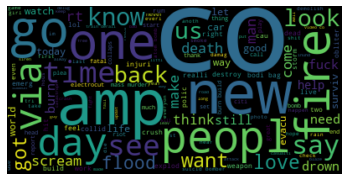

In [58]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(" ".join(corpus))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = len(uniqueWords))
X = cv.fit_transform(corpus).todense()
y = train['target'].values

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=100)

print("data splitted")

data splitted


In [62]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

G:\INSTALLED\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[765,  95],
       [210, 441]], dtype=int64)

In [64]:
print('Accuracy Score for Train Data set is {}'.format(lr.score(X_train, y_train)))
print('Accuracy Score for Test Data set is {}'.format(lr.score(X_test, y_test)))

Accuracy Score for Train Data set is 0.830491640456878
Accuracy Score for Test Data set is 0.7981469225678358
